In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [9]:
df = pd.read_csv("bikes.csv")
df.head(5)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1


In [128]:
df["datetime"] = pd.to_datetime(df["datetime"], format="%Y-%m-%d %H:%M:%S")

In [129]:
# now we see datetime object converted to datetime64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             10886 non-null  datetime64[ns]
 1   season               10672 non-null  object        
 2   holiday              10030 non-null  float64       
 3   workingday           9388 non-null   float64       
 4   weather              8746 non-null   object        
 5   temp                 8104 non-null   float64       
 6   humidity             7462 non-null   float64       
 7   windspeed            6820 non-null   float64       
 8   casual               10886 non-null  int64         
 9   registered           10886 non-null  int64         
 10  rented_bikes_count   10886 non-null  int64         
 11  total daily profits  10886 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 1020.7+ KB


In [170]:
# we can now extract some additional features
df["Year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["Month name"]=df["datetime"].dt.month_name()
df["weekday"]=df["datetime"].dt.weekday
df["week"]=df["datetime"].dt.week
df["day name"]=df["datetime"].dt.day_name()
df["hours"]=df["datetime"].dt.hour
df["minutes"]=df["datetime"].dt.minute
df["seconds"] =df["datetime"].dt.second
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             10886 non-null  datetime64[ns]
 1   season               10672 non-null  object        
 2   holiday              10030 non-null  float64       
 3   workingday           9388 non-null   float64       
 4   weather              8746 non-null   object        
 5   temp                 8104 non-null   float64       
 6   humidity             7462 non-null   float64       
 7   windspeed            6820 non-null   float64       
 8   casual               10886 non-null  int64         
 9   registered           10886 non-null  int64         
 10  rented_bikes_count   10886 non-null  int64         
 11  total daily profits  10886 non-null  float64       
 12  Year                 10886 non-null  int64         
 13  month                10886 non-

**New we have seen additional features this techinque called 'Feature Engineering'**

## Question1:
1. Make Profit Feature.
    - Each registerd user rent bike for 5 USD/hour.
    - Casual user rent bike for 20 USD/hour.
    - Taxes 0.14%.
    - Maintance 1500/year.

**Before we calculate the total amount of profits per day we need to invstigate some formula**
- taxes calculated per year since we have dataset stored per day we divide the percent of taxe to be daily.
- each registerd rent a bike about 5USD per hr so we must multiply them
- also for causal rented a bike per hr for 20USD we again must multiply them
- cost of maintance: Our company pays to maintance bikes yarlly about 1500 since again our dataset recorded in hours per day we need to divide cost of maintaining a bike to calculated daily.

**So the final formula for porfits  daly will be..**
* tax = 0.14 / (365 * 24)
* maintance = 1500 / (365 * 24)
* registerd = registerd * 5
* causal = casual * 20
* total profits = ((registerd + casual) - maintance ) * tax

In [25]:
def daily_profits(X):
    tax_per_day = 0.14 / (365 * 24)
    maintance_per_day = 1500 / (365 * 24)
    registered_profits = X[0] * 5
    casual_profits = X[1] * 20
    total_day_profits = (casual_profits + registered_profits) - maintance_per_day
    daily_profit = total_day_profits - (total_day_profits * tax_per_day)
    return daily_profit
    
df["total daily profits"] = df[["registered", "casual"]].apply(daily_profits, axis=1)
df.head(1)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,total daily profits
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,124.826772


 ## Question 2:
2. Distribution rental_bikes_count & profit.

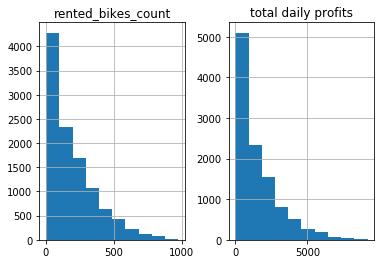

In [44]:
df.hist(["rented_bikes_count", "total daily profits"])
plt.show()

## Question 3:
3. Profit for each day.

In [180]:
df[["day name", "total daily profits"]].head(5)

,day name,total daily profits
0,Saturday,124.826772
1,Saturday,319.823656
2,Saturday,234.825014
3,Saturday,109.827012
4,Saturday,4.828690


## Question 4:
4. Which season that has more registeration & profit.

In [75]:
df[(df["total daily profits"] == df["total daily profits"]) & (df["registered"] == df["registered"].max())]["season"].to_frame()

,season
9345,Fall


## Question 5:
5. Which weather condition that has more registeration & profit.

In [74]:
df[(df["total daily profits"] == df["total daily profits"]) & (df["registered"] == df["registered"].max())]["weather"].to_frame()

,weather
9345,Clear


In [80]:
df[(df["total daily profits"] == df["total daily profits"]) & (df["registered"] == df["registered"].max())]["temp"].to_frame()

,temp
9345,27.06


In [82]:
df[(df["total daily profits"] == df["total daily profits"]) & (df["registered"] == df["registered"].max())]["windspeed"].to_frame()

,windspeed
9345,16.9979


## Question 6:
6. Correlation between profit & bikes count with all features.

In [89]:
df.corr()[["rented_bikes_count", "total daily profits"]]

,rented_bikes_count,total daily profits
holiday,-0.005827,0.017410
workingday,0.010940,-0.150218
temp,0.391867,0.462618
humidity,-0.317282,-0.358150
windspeed,0.097747,0.100205
casual,0.690414,0.902713
registered,0.970948,0.822156
rented_bikes_count,1.000000,0.934490
total daily profits,0.934490,1.000000


## Question 7:
7. Rentals during rush hours (7-9 am & 3-5 pm).

In [182]:
df["hours"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [195]:
def hours(x):
    if x in [7,8,9, 15,16,17]:
        return x
    
df["hours"].apply(hours).sum()

32808.0

## Question 8:
8. Rentals during workday & holiday

In [100]:
df[df["workingday"] == 1.0]["rented_bikes_count"].sum()

1226368

In [99]:
df[df["holiday"] == 1.0]["rented_bikes_count"].sum()

54128

## Question 9:
8. Registered or casual is more.

In [111]:
df[df["holiday"] == 1.0]["registered"].sum() > df[df["holiday"] == 1.0]["casual"].sum()

True

In [110]:
df[df["workingday"] == 1.0]["registered"].sum() < df[df["workingday"] == 1.0]["casual"].sum()

False

## Question 10:
9. What is the average of bikes would be registered during the week.

In [200]:
df["weekday"].unique()

array([5, 6, 0, 1, 2, 3, 4], dtype=int64)

In [209]:
def duration(x):
    if x in [0, 1, 2, 3, 4, 5, 6]:
        return x
    
df["rented_bikes_count"].mean()
# either way those tow codes are worked
# df[df["weekday"] == df["weekday"].apply(duration)]["rented_bikes_count"].mean()

191.57413191254824

## Question 11:
10. Schools (9-12) & (2-6) profit.

In [236]:
def schools(x):
    if x in [2, 3, 4, 5, 6, 9, 10, 11, 12]:
        return x

# the total profits during schools
df[df["month"] == df["month"].apply(schools)]["total daily profits"].sum()
# the average profits during schools
df[df["month"] == df["month"].apply(schools)]["total daily profits"].mean()

1492.6252837290942

## Question 12:
11. Profit in 2011 & saturdays & season fall

In [221]:
# the total profis per day during above condtion
df[(df["Year"]==2011) & (df["day name"]=="Saturday") & (df["season"] == "Fall")]["total daily profits"].sum()

408946.44367384445

In [222]:
# the average profits
df[(df["Year"]==2011) & (df["day name"]=="Saturday") & (df["season"] == "Fall")]["total daily profits"].mean()

2186.8793779349962